In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('./data/breast_cancer.csv')

In [3]:
#highly correlated columns to remove
to_drop = ['worst radius', 'worst texture', 'worst perimeter', 'worst area','worst concave points','mean concave points','radius error','area error','mean radius','mean perimeter']
df.drop(to_drop,axis=1,inplace=True)

In [4]:
## Independent and dependent features
X = df.drop('target',axis=1)
y = df['target']

In [5]:
y

0      0
1      0
2      0
3      0
4      0
      ..
564    1
565    0
566    1
567    1
568    0
Name: target, Length: 569, dtype: int64

In [6]:
#rectifying target imbalance
from imblearn.combine import SMOTETomek

resampler = SMOTETomek(sampling_strategy="auto")
X , y = resampler.fit_resample(X, y)

In [7]:
X[y==1].shape , X[y==0].shape

((337, 20), (337, 20))

In [8]:
#All features in X are numerical in nature
numerical_cols = X.columns
numerical_cols

Index(['mean texture', 'mean area', 'mean smoothness', 'mean compactness',
       'mean concavity', 'mean symmetry', 'mean fractal dimension',
       'texture error', 'perimeter error', 'smoothness error',
       'compactness error', 'concavity error', 'concave points error',
       'symmetry error', 'fractal dimension error', 'worst smoothness',
       'worst compactness', 'worst concavity', 'worst symmetry',
       'worst fractal dimension'],
      dtype='object')

In [9]:
# since all the features are only numerical in nature creating only numerical pipeline
from sklearn.impute import SimpleImputer ## HAndling Missing Values
from sklearn.preprocessing import StandardScaler # HAndling Feature Scaling
## pipelines
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

In [10]:
numerical_pipeline = Pipeline(
    steps=[
        ('imputer',SimpleImputer(strategy='median')),
        ('scaler', StandardScaler())
    ]
)

preprocessor = ColumnTransformer([
    ('numerical_pipeline',numerical_pipeline , numerical_cols)
])

In [11]:
## Train test split

from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.30,random_state=30)

In [12]:
X_train=pd.DataFrame(preprocessor.fit_transform(X_train),columns=preprocessor.get_feature_names_out())
X_test=pd.DataFrame(preprocessor.transform(X_test),columns=preprocessor.get_feature_names_out())

In [13]:
X_train.shape , X_test.shape

((471, 20), (203, 20))

In [14]:
X_train.head()

,numerical_pipeline__mean texture,numerical_pipeline__mean area,numerical_pipeline__mean smoothness,numerical_pipeline__mean compactness,numerical_pipeline__mean concavity,numerical_pipeline__mean symmetry,numerical_pipeline__mean fractal dimension,numerical_pipeline__texture error,numerical_pipeline__perimeter error,numerical_pipeline__smoothness error,numerical_pipeline__compactness error,numerical_pipeline__concavity error,numerical_pipeline__concave points error,numerical_pipeline__symmetry error,numerical_pipeline__fractal dimension error,numerical_pipeline__worst smoothness,numerical_pipeline__worst compactness,numerical_pipeline__worst concavity,numerical_pipeline__worst symmetry,numerical_pipeline__worst fractal dimension
0,-2.105245,-0.843762,-0.268268,-0.838912,-0.828622,-0.630615,-0.217231,-1.359588,-0.930287,-0.320810,-0.649737,-0.621976,-0.961981,-0.844049,-0.634506,0.878031,-0.249855,-0.466684,0.079158,-0.009074
1,0.922938,2.591197,0.326972,0.236627,1.276580,-0.138297,-1.072114,-0.578906,1.227488,-0.338919,-0.336012,-0.012265,0.161154,-0.561316,-0.231943,0.459369,0.047006,0.725469,-0.253478,-0.260552
2,0.166003,-0.494141,-1.744514,-1.098527,-1.035719,-0.457581,-0.539607,0.401487,-0.397163,0.292090,-0.360902,-0.677468,-1.100623,0.030260,-0.444518,-0.994411,-0.703270,-1.095577,-0.457654,-0.599202
3,-0.235905,1.128214,0.830585,0.596335,1.475565,-0.043805,-0.214366,0.288408,0.171705,-0.582388,0.070419,0.257569,-0.141886,-0.404538,-0.248773,0.729977,0.563732,1.343236,0.487069,0.253085
4,-0.700903,-0.921484,0.743662,-0.632877,-0.884993,-0.453820,0.108010,0.251875,-0.826103,-0.627608,-0.977508,-0.768887,-0.803687,-0.403360,-0.637577,0.098572,-0.803216,-0.955277,0.049788,-0.355383


In [15]:
from sklearn.decomposition import PCA
covar_matrix = PCA(n_components=X_train.shape[1])
covar_matrix.fit(X_train)

PCA(n_components=20)

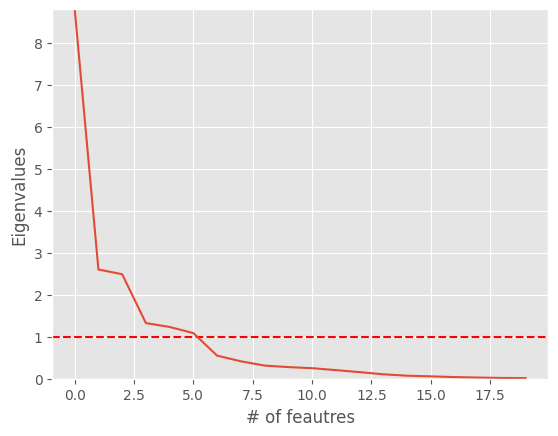

In [16]:
import matplotlib.pyplot as plt
plt.style.use("ggplot") 
plt.ylabel('Eigenvalues')
plt.xlabel('# of feautres')
plt.ylim(0,max(covar_matrix.explained_variance_))
plt.axhline(y=1,color = 'r' , linestyle = '--')
plt.plot(covar_matrix.explained_variance_)
plt.show()

In [17]:
pca = PCA(n_components=5)
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)

In [18]:
pca.explained_variance_ratio_*100

array([43.92437473, 12.98106585, 12.41663669,  6.61450277,  6.15102121])

In [19]:
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import RidgeClassifier
from sklearn.naive_bayes import BernoulliNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.metrics import  accuracy_score , roc_auc_score , f1_score

In [20]:
# a function to evaluate the model
def evaluate_model(true, predicted):
    accuracy = accuracy_score(true, predicted)
    roc_score = roc_auc_score(true, predicted)
    f_1_score = f1_score(true, predicted)

    return accuracy , roc_score , f_1_score

In [21]:
models={
    'LogisticRegression':LogisticRegression(),
    'RidgeClassifier':RidgeClassifier(),
    'BernoulliNB':BernoulliNB(),
    'DecisionTreeClassifier':DecisionTreeClassifier(),
    'KNeighborsClassifier':KNeighborsClassifier(),
    'AdaBoostClassifier':AdaBoostClassifier(),
    'GradientBoostingClassifier':GradientBoostingClassifier(),
    'BaggingClassifier':BaggingClassifier(),
    'RandomForestClassifier':RandomForestClassifier(),
    'SVC':SVC(),
    'XGBClassifier':XGBClassifier()
}
model_list=[]
roc=[]
acc = []
f1 = []
performance = []
for i in range(len(list(models))):
    model=list(models.values())[i]
    model.fit(X_train,y_train)

    #Make Predictions
    y_pred=model.predict(X_test)

    accuracy , roc_score  , f_1_score =evaluate_model(y_test,y_pred)

    print(list(models.keys())[i])
    model_list.append(list(models.keys())[i])
    roc.append(roc_score)
    acc.append(accuracy)
    f1.append(f_1_score)
    performance.append((list(models.keys())[i] , accuracy ))


    print('Model Training Performance')
    print("ROC:",roc_score)
    print("Accuracy:",accuracy)

    
    print('='*35)
    print('\n')

print("Best Model" , sorted(performance , key = lambda x: x[1])[-1])
model = models[sorted(performance , key = lambda x: x[1])[-1][0]]
print(model)

metrics = pd.DataFrame({"models": model_list , "accuracy" : acc , "roc_auc_score": roc , "f1_score" : f1})
print(metrics.sort_values('accuracy',ascending=False))


LogisticRegression
Model Training Performance
ROC: 0.9655825242718447
Accuracy: 0.9655172413793104


RidgeClassifier
Model Training Performance
ROC: 0.9304368932038835
Accuracy: 0.9310344827586207


BernoulliNB
Model Training Performance
ROC: 0.8721844660194176
Accuracy: 0.8719211822660099


DecisionTreeClassifier
Model Training Performance
ROC: 0.926747572815534
Accuracy: 0.9261083743842364


KNeighborsClassifier
Model Training Performance
ROC: 0.9507281553398058
Accuracy: 0.9507389162561576


AdaBoostClassifier
Model Training Performance
ROC: 0.955873786407767
Accuracy: 0.9556650246305419


GradientBoostingClassifier
Model Training Performance
ROC: 0.950873786407767
Accuracy: 0.9507389162561576


BaggingClassifier
Model Training Performance
ROC: 0.9213106796116505
Accuracy: 0.9211822660098522


RandomForestClassifier
Model Training Performance
ROC: 0.950873786407767
Accuracy: 0.9507389162561576


SVC
Model Training Performance
ROC: 0.9408737864077669
Accuracy: 0.9408866995073891


XG